# Base de dados


In [1]:
import pandas as pd

dataSetIfg = pd.read_csv('dataset_if_portugues.csv')


# Exibir as primeiras linhas para verificar se a leitura foi correta
print(dataSetIfg.head())

                                                text
0  Especialização gratuita em Docência do IFMS ab...
1  Não ironicamente eu gosto mais do ifb do que q...
2                              saudade almoço do ifb
3                        Quem bora pra festa do IFB?
4  hj vi a saga de diários de vampiro inteira na ...


In [2]:
print(dataSetIfg.columns)

Index(['text'], dtype='object')


In [3]:
num_linhas = dataSetIfg.shape[0]
print(f"Quantidade de linhas: {num_linhas}")

Quantidade de linhas: 75802


# Pré-processamento

## Limpar texto e Aplicar TF - Histograma das palavras mais frequentes

In [4]:
import pandas as pd
import re

# Função para limpar o texto
def clean_text(text):
    if isinstance(text, str):  # Verifica se é uma string
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove hashtags
        text = re.sub(r'#\S+', '', text)
        # Remove menções
        text = re.sub(r'@\S+', '', text)
        return text
    return text  

# Função para remover palavras ofensivas
def remove_offensive_words(text, offensive_words):
    if isinstance(text, str):  # Verifica se é uma string
        words = text.split()  # Divide o texto em palavras
        cleaned_words = [word for word in words if word.lower() not in offensive_words]
        return ' '.join(cleaned_words)
    return text  

# Lista de palavras ofensivas
offensive_words = ['vtnc', 'porra', 'desgraca', 'desgraça', 'puto', 'foder', 'vsf', 'puta', 'caralho']

# Aplicar as funções no dataset
dataSetIfg['text'] = dataSetIfg['text'].apply(clean_text)
dataSetIfg['Message_Cleaned'] = dataSetIfg['text'].apply(lambda x: remove_offensive_words(x, offensive_words))

# Verificar as primeiras linhas
print(dataSetIfg[['text', 'Message_Cleaned']])


                                                    text  \
0      Especialização gratuita em Docência do IFMS ab...   
1      Não ironicamente eu gosto mais do ifb do que q...   
2                                  saudade almoço do ifb   
3                            Quem bora pra festa do IFB?   
4      hj vi a saga de diários de vampiro inteira na ...   
...                                                  ...   
75797  agora vim do ifma em uma pop com 3 pessoas e 3...   
75798    No dia 30/07  o   em parceria com a coordena...   
75799             Às vezes bate uma saudade do ifal tlgd   
75800  eu e julia ouvindo chappell roan ao lado do ma...   
75801   o ginasio do ifba fica trancado ate hoje quan...   

                                         Message_Cleaned  
0      Especialização gratuita em Docência do IFMS ab...  
1      Não ironicamente eu gosto mais do ifb do que q...  
2                                  saudade almoço do ifb  
3                            Quem bora pra 

## Histograma de palavras mais frequentes

In [5]:
# Load the regular expression library
import re

# Remover pontuação, garantindo que o valor seja uma string
dataSetIfg['text_processed'] = dataSetIfg['Message_Cleaned'].map(
    lambda x: re.sub('[,\.!?]', '', x) if isinstance(x, str) else x
)

# Converter para letras minúsculas, garantindo novamente o tipo string
dataSetIfg['text_processed'] = dataSetIfg['text_processed'].map(
    lambda x: x.lower() if isinstance(x, str) else x
)

# Exibir as primeiras linhas do resultado
print(dataSetIfg['text_processed'].head())


0    especialização gratuita em docência do ifms ab...
1    não ironicamente eu gosto mais do ifb do que q...
2                                saudade almoço do ifb
3                           quem bora pra festa do ifb
4    hj vi a saga de diários de vampiro inteira na ...
Name: text_processed, dtype: object


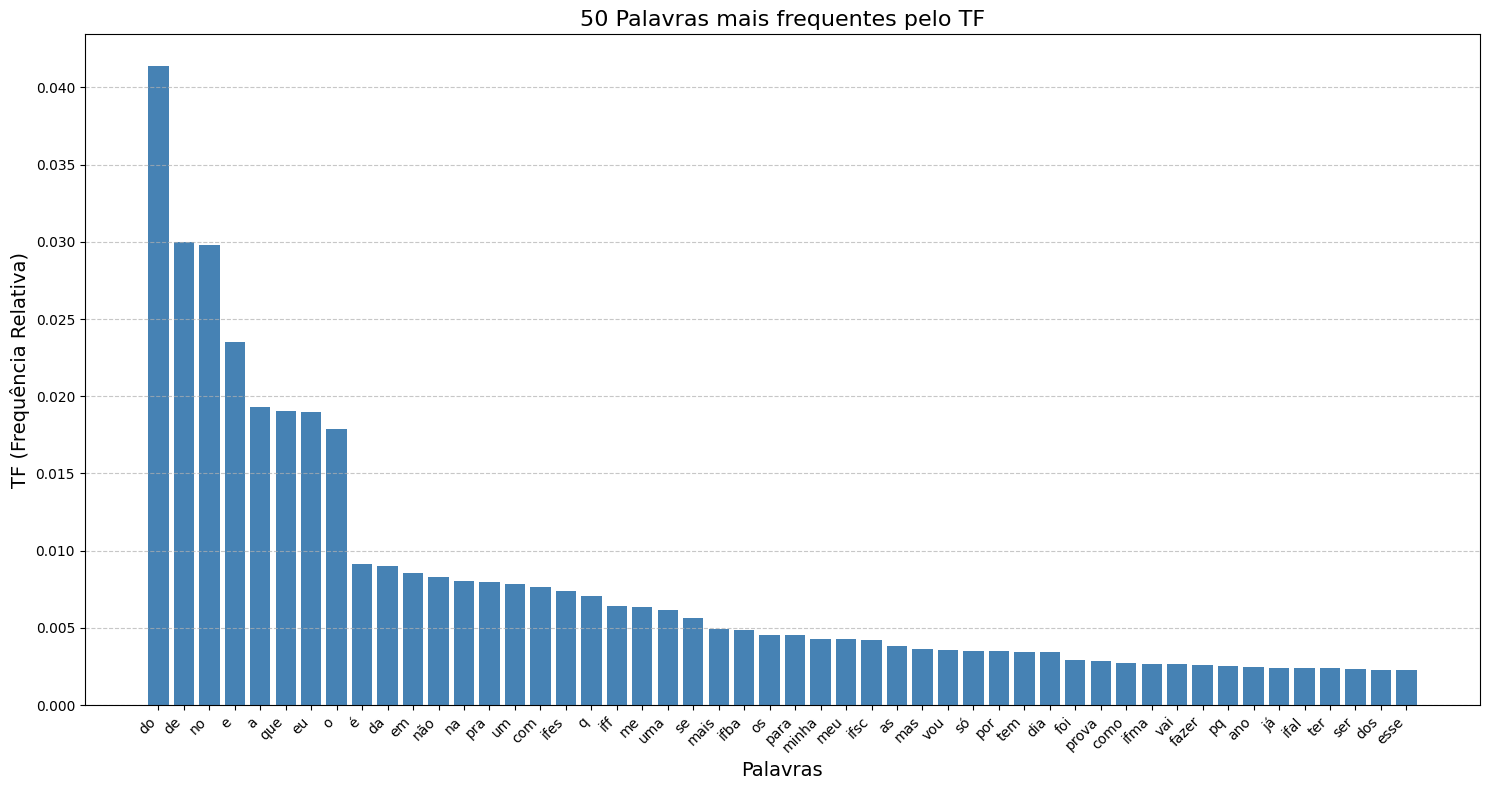

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Separar todas as palavras
all_words = []
for message in dataSetIfg['text_processed']:
    if isinstance(message, str):  # Verifica se o valor é uma string
        all_words.extend(message.split())  # Divide o texto em palavras e adiciona à lista

# Calcular a frequência total das palavras (TF)
total_words = len(all_words)
word_counts = Counter(all_words)
tf = {word: count / total_words for word, count in word_counts.items()}

# Ordenar palavras pelo TF em ordem decrescente e pegar as 50 mais frequentes
sorted_tf = sorted(tf.items(), key=lambda x: x[1], reverse=True)[:50]

# Separar palavras e valores de TF
words = [item[0] for item in sorted_tf]
tf_values = [item[1] for item in sorted_tf]

# Gerar histograma das palavras mais frequentes pelo TF
plt.figure(figsize=(15, 8))
plt.bar(words, tf_values, color='steelblue')
plt.xlabel('Palavras', fontsize=14)
plt.ylabel('TF (Frequência Relativa)', fontsize=14)
plt.title('50 Palavras mais frequentes pelo TF', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


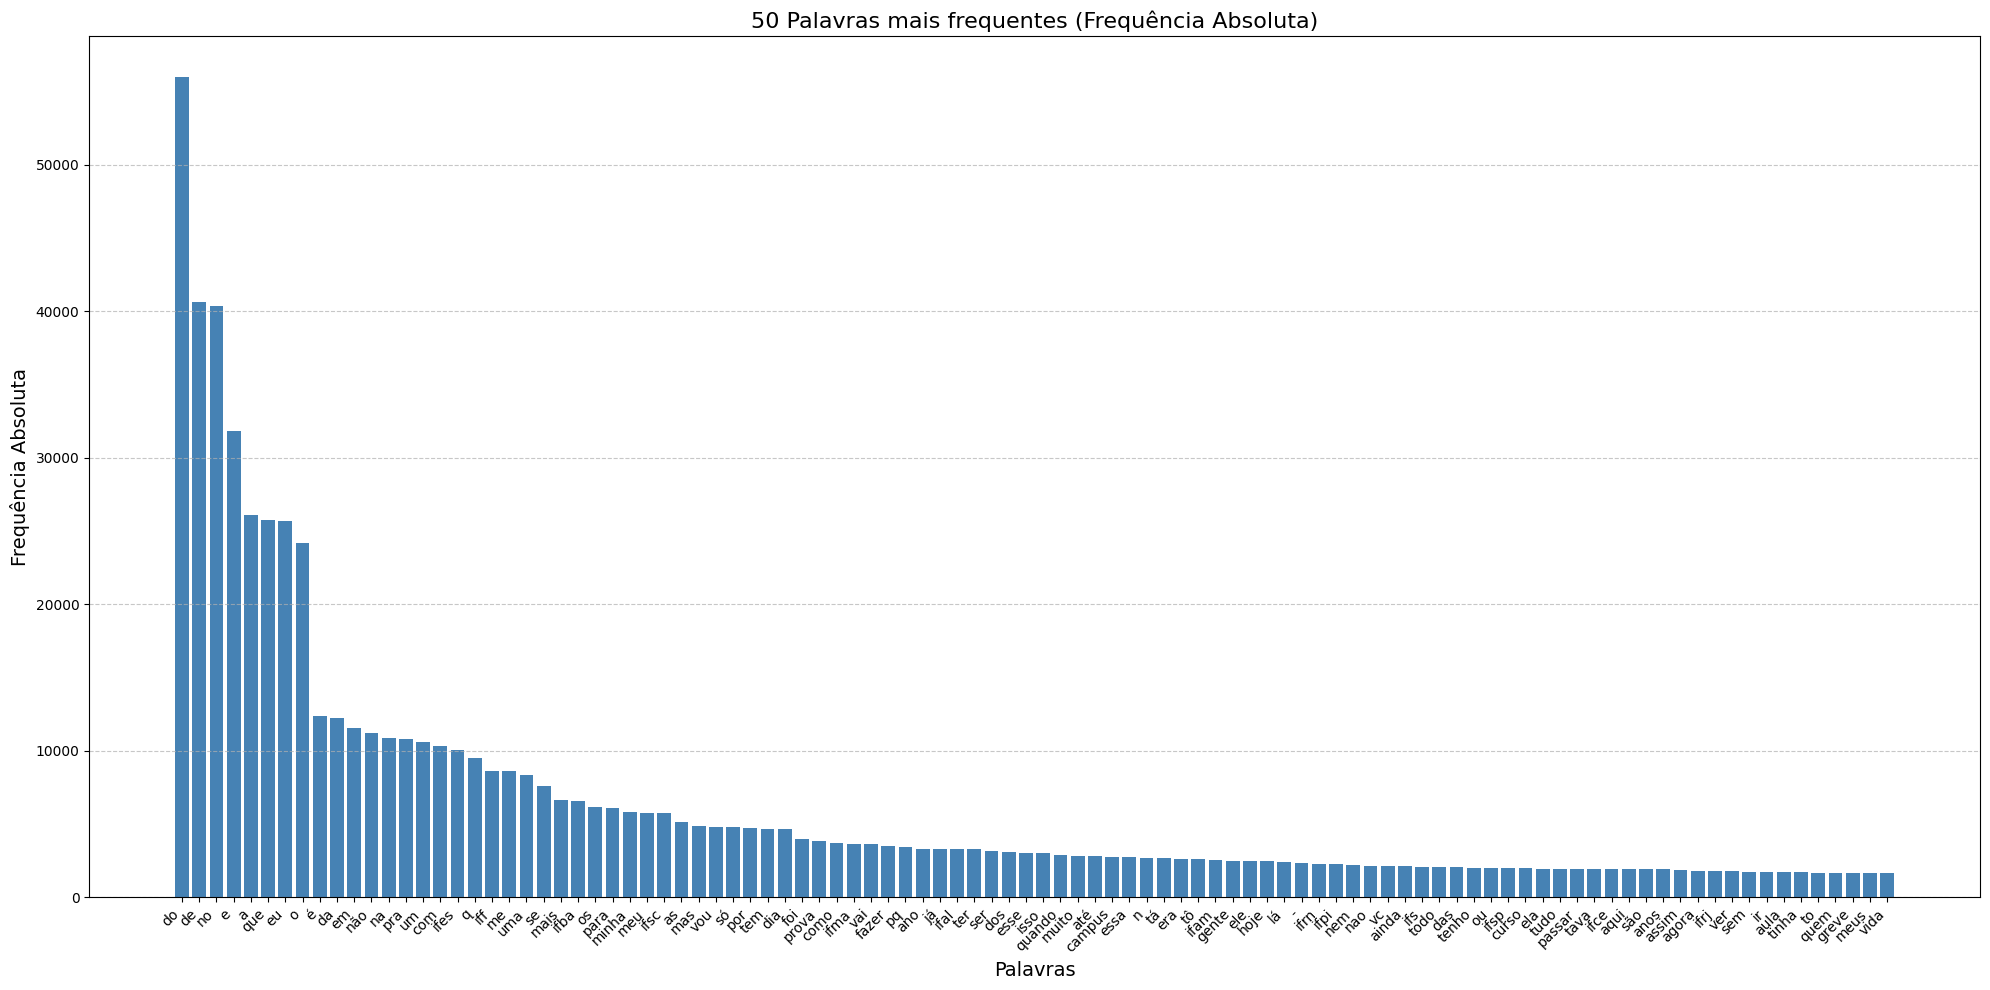

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Separar todas as palavras
all_words = []
for message in dataSetIfg['text_processed']:
    if isinstance(message, str):  # Verifica se o valor é uma string
        all_words.extend(message.split())  # Divide o texto em palavras e adiciona à lista

# Calcular a frequência absoluta das palavras
word_counts = Counter(all_words)

# Ordenar palavras pelo total em ordem decrescente e pegar as 100 mais frequentes
sorted_word_counts = word_counts.most_common(100)

# Separar palavras e suas contagens absolutas
words = [item[0] for item in sorted_word_counts]
word_totals = [item[1] for item in sorted_word_counts]

# Gerar histograma das palavras mais frequentes pelo total
plt.figure(figsize=(20, 10))
plt.bar(words, word_totals, color='steelblue')
plt.xlabel('Palavras', fontsize=14)
plt.ylabel('Frequência Absoluta', fontsize=14)
plt.title('50 Palavras mais frequentes (Frequência Absoluta)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [8]:
# Extrair as palavras com aspas simples
frequent_words = [f"'{item[0]}'" for item in sorted_word_counts]

# Gerar texto com as palavras separadas por vírgula
words_text = ', '.join(frequent_words)

# Imprimir o resultado
print("Palavras mais frequentes:")
print(words_text)

Palavras mais frequentes:
'do', 'de', 'no', 'e', 'a', 'que', 'eu', 'o', 'é', 'da', 'em', 'não', 'na', 'pra', 'um', 'com', 'ifes', 'q', 'iff', 'me', 'uma', 'se', 'mais', 'ifba', 'os', 'para', 'minha', 'meu', 'ifsc', 'as', 'mas', 'vou', 'só', 'por', 'tem', 'dia', 'foi', 'prova', 'como', 'ifma', 'vai', 'fazer', 'pq', 'ano', 'já', 'ifal', 'ter', 'ser', 'dos', 'esse', 'isso', 'quando', 'muito', 'até', 'campus', 'essa', 'n', 'tá', 'era', 'tô', 'ifam', 'gente', 'ele', 'hoje', 'lá', '-', 'ifrn', 'ifpi', 'nem', 'nao', 'vc', 'ainda', 'ifs', 'todo', 'das', 'tenho', 'ou', 'ifsp', 'curso', 'ela', 'tudo', 'passar', 'tava', 'ifce', 'aqui', 'são', 'anos', 'assim', 'agora', 'ifrj', 'ver', 'sem', 'ir', 'aula', 'tinha', 'to', 'quem', 'greve', 'meus', 'vida'


## Remover StopWords


In [9]:
import nltk
from nltk.corpus import stopwords

# Baixe o conjunto de stop words (apenas na primeira vez que executar)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aluno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Corrigir a extensão das stopwords
stop_words = stopwords.words('portuguese')
stop_words.extend(['do', 'no', 'de', 'e', 'a', 'eu', 'que', 'o', 'é', 'da', 'em', 'na', 'não', 'pra', 'um', 'com', 'q', 'me', 'uma', 'se', 'ifs', 'ifba', 'mais', 'os', 'ifsc', 'para', 'meu', 'minha', 'as', 'só', 'vou', 'buts', 'mas', 'tem', 'por', 'dia', 'foi', 'prova', 'vai', 'ifma', 'como', 'fazer', 'pq', 'ifal', 'ter', 'ano', 'já', 'ser', 'esse', 'dos', 'isso', 'n', 'quando', 'muito', 'até', 'campus', 'essa', 'tá', 'era', 'ifam', 'tô', 'gente', 'ele', '-', 'hoje', 'lá', 'ifpi', 'vc', 'ifrn', 'nem', 'nao', 'ainda', 'to', 'ifsp', 'ela', 'todo', 'passar', 'ifce', 'das', 'tenho', 'ou', 'tava', 'curso', 'tudo', 'aqui', 'assim', 'são', 'anos', 'agora', 'ver', 'ir', 'sem', 'nunca', 'tinha', 'quem'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Pré-processamento dos dados
data = dataSetIfg.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# Remover stop words
data_words = remove_stopwords(data_words)

# Imprimir os primeiros resultados processados
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/aluno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['especializacao', 'gratuita', 'docencia', 'ifms', 'abre', 'vagas', 'co', 'jpyhozmvwg']


In [11]:
print(len(data_words))

75802


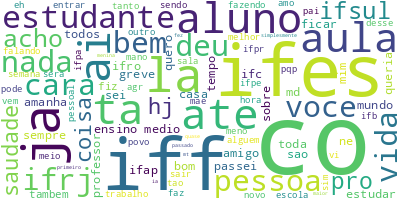

In [12]:
# Importar a biblioteca wordcloud
from wordcloud import WordCloud

# Juntar as palavras processadas (depois da remoção das stopwords) em uma única string
long_string = ','.join([' '.join(doc) for doc in data_words])

# Criar a WordCloud
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

# Gerar a nuvem de palavras
wordcloud.generate(long_string)

# Visualizar a WordCloud
wordcloud.to_image()

# Mineração - LDA

In [13]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


# BERTopic - Lemantização e Tokenização

In [14]:
pip install bertopic

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Corrigir a extensão das stopwords
stop_words_bert = stopwords.words('portuguese')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Pré-processamento dos dados
data_bert = dataSetIfg.text_processed.values.tolist()
data_words_bert = list(sent_to_words(data_bert))

# Imprimir os primeiros resultados processados
print(data_words_bert[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/aluno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['especializacao', 'gratuita', 'em', 'docencia', 'do', 'ifms', 'abre', 'vagas', 'co', 'jpyhozmvwg']


In [16]:
import gensim.corpora as corpora

# Create Dictionary
id2wordBERT = corpora.Dictionary(data_words_bert)

# Create Corpus
texts_bert = data_words_bert

# Term Document Frequency
corpusBERT = [id2wordBERT.doc2bow(text) for text in texts_bert]

# View
print(corpusBERT[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [17]:
import nltk
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from gensim.models.coherencemodel import CoherenceModel

2025-02-26 17:14:38.761332: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-26 17:14:38.761489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-26 17:14:38.761586: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 17:14:38.775476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-26 17:14:41.453193: W tensorflow/compiler/

In [18]:
import nltk

# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') 

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# List to store processed text
filtered_text = [
    ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(' '.join(doc)) if word.isalpha()])
    for doc in texts_bert
]

# Check the first few entries after preprocessing
print(filtered_text[:10])

[nltk_data] Downloading package punkt to /home/aluno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aluno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aluno/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/aluno/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['especializacao gratuita em docencia do ifms abre vagas co jpyhozmvwg', 'nao ironicamente eu gosto mais do ifb do que qualquer outra escola que eu tenha estudado', 'saudade almoco do ifb', 'quem bora pra festa do ifb', 'hj vi saga de diarios de vampiro inteira na biblioteca do ifmg', 'instituto oferece reforco escolar com disciplinar militar alem de atividades esportivas de musicalizacao para criancas adolescentes conta com parceria da forcas armada da ufms do ifms apoio de empresarios agora esta reivindicando tambem apoio do poder publico', 'nosso informativo semanal ja esta disponivel leia a ultima noticias do ifmg co hamccj bzq', 'publicado regulamento para transicao da gestao do ifmg documento assinado pelo reitor kleber gloria pelo reitor eleito rafael bastos define protocolo que da inicio a acoes que irao culminar na mudanca de gestao na reitoria saiba mais co erjeumoidm co xthbheiwqn', 'nao que eu goste de fofoca ma tu ta sabendo que sao a fake new que estao rolando pra tentar 

#  Etapas - BERTopic
- Sbert
- UMAP
- HDBSCAN
- C-TF-IDF

In [20]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

In [21]:
print(len(filtered_text))

75802


In [22]:
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [23]:
#!pip install spacy
#!python -m spacy download pt_core_news_sm

In [24]:
import spacy
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Carregue o modelo de português do spaCy
#nlp = spacy.load("pt_core_news_sm")
#portuguese_stop_words = nlp.Defaults.stop_words


In [25]:
vectorizer_model = CountVectorizer(stop_words=stop_words_bert)

In [26]:
ctfidf_model = ClassTfidfTransformer()

In [27]:
#topic_model = BERTopic(
  #embedding_model=embedding_model,    # Step 1 - Extract embeddings
  #umap_model=umap_model,              # Step 2 - Reduce dimensionality
  #hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  #vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  #ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  #nr_topics=2
#)

# NMF


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(
    #max_features=1000,  # Número de palavras para manter
    #stop_words='english',  # Remove stopwords
    lowercase=True,  # Converte para minúsculas
)
tfidf = vectorizer.fit_transform(filtered_text)

In [30]:
# Configuração do NMF
nmf_model = NMF(n_components=5, random_state=42)  # 5 tópicos
# Ajustar o modelo aos dados
W = nmf_model.fit_transform(tfidf)  # Documentos x Tópicos
H = nmf_model.components_  # Tópicos x Palavras

In [31]:
import numpy as np

# Obter as palavras do vocabulário
palavras = vectorizer.get_feature_names_out()

# Exibir os tópicos
for i, topic in enumerate(H):
    top_palavras = [palavras[i] for i in topic.argsort()[-10:]]  # 10 palavras mais relevantes
    print(f"Tópico {i+1}: {', '.join(top_palavras)}")

Tópico 1: minha, to, ma, vou, se, pra, me, nao, que, eu
Tópico 2: dia, na, com, um, para, em, da, co, do, de
Tópico 3: ano, assim, passei, dia, ifsc, ifba, excuse, buts, ifs, no
Tópico 4: na, to, ta, saudade, feria, faltam, dia, prova, do, ifes
Tópico 5: amanha, vai, pra, essa, ta, to, saudade, prova, do, iff


In [32]:
# Adicionando os pesos para os tópicos nos documentos
df_topics = pd.DataFrame(W, columns=[f"Tópico {i+1}" for i in range(W.shape[1])])
print(df_topics.head())

   Tópico 1  Tópico 2  Tópico 3  Tópico 4  Tópico 5
0  0.000000  0.022381       0.0  0.000437  0.000434
1  0.049174  0.008957       0.0  0.005630  0.004206
2  0.000000  0.012979       0.0  0.011780  0.016543
3  0.005445  0.012156       0.0  0.009022  0.010609
4  0.000000  0.033801       0.0  0.000235  0.000000


In [33]:
vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = vectorizer.fit_transform(filtered_text)
feature_names = vectorizer.get_feature_names_out()

# Intervalo de confiança Tempo computacional


In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
import pickle
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from gensim.models import LdaModel
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from random import randint
from gensim.corpora import Dictionary
import time

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from transformers import AutoModel, AutoTokenizer
import torch

# Classe personalizada para usar o modelo salvo como SentenceTransformer
class CustomSentenceTransformer:
    def __init__(self, model_name_or_path, **kwargs):
        self.model = AutoModel.from_pretrained(model_name_or_path)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def encode(self, sentences, **kwargs):
        inputs = self.tokenizer(
            sentences, 
            return_tensors='pt', 
            padding=True, 
            truncation=True, 
            max_length=128
        ).to(self.device)
        with torch.no_grad():
            outputs = self.model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Média dos tokens para obter o embedding da sentença
        return embeddings.cpu().numpy()


# Função para medir o tempo de treino do modelo LDA
def train_lda_model(corpus, dictionary, num_topics):
    start_time = time.time()
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    end_time = time.time()
    return end_time - start_time

# Função para medir o tempo de treino do modelo NMF
def train_nmf_model(tfidf_matrix, num_topics):
    start_time = time.time()
    random_state = randint(0, 10000)
    nmf_model = NMF(n_components=num_topics, random_state=random_state)
    nmf_model.fit(tfidf_matrix)
    end_time = time.time()
    return end_time - start_time

# Função para medir o tempo de treino do modelo BERTopic
def train_bertopic_model(filtered_text, num_topics, embedding_model):
    start_time = time.time()
    processed_texts = [" ".join(tokens) for tokens in filtered_text]
    topic_model = BERTopic(nr_topics=num_topics, embedding_model=embedding_model)
    topic_model.fit_transform(processed_texts)
    end_time = time.time()
    return end_time - start_time

# Carregar modelos
multilingual_model = SentenceTransformer("all-mpnet-base-v2")
bertimbau_model = SentenceTransformer("neuralmind/bert-large-portuguese-cased")
bertweet_model = SentenceTransformer("melll-uff/bertweetbr")
multilingual_mpnet_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

# Carregar o modelo personalizado (fine-tuning)
model_path = "/home/aluno/paulo/TCCII/TestesBERT/meu_modelo_bert" 
custom_model = CustomSentenceTransformer(model_path)

# Tokenizar os documentos para o dicionário do Gensim
filtered_text = texts_bert  
filtered_text_nmf = [" ".join(texto) if isinstance(texto, list) else texto for texto in filtered_text]

# Criar matriz TF-IDF para NMF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(filtered_text_nmf)

# Criar dicionário e corpus para LDA
data_words = [texto.split() for texto in filtered_text_nmf]
id2wordNMF = Dictionary(data_words)
corpus = [id2wordNMF.doc2bow(texto) for texto in data_words]

# Configuração dos tópicos e validação cruzada
topics_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for num_topics in topics_list:
    print(f"Processando {num_topics} tópicos com {kf.n_splits}-Fold Cross-Validation...")
    nmf_times, multilingual_times, multilingual_mpnet_times, bertimbau_times, bertweet_times, bert_tunado_times, lda_times = [], [], [], [], [], [], []

    for fold_index, (train_index, val_index) in enumerate(kf.split(filtered_text), start=1):
        print(f"  Processando fold {fold_index}...")

        train_text = [filtered_text[i] for i in train_index]

        # BERTopic Multilingual
        time_bertopic_multilingual = train_bertopic_model(train_text, num_topics, multilingual_model)
        multilingual_times.append(time_bertopic_multilingual)

        # BERTopic multilingual MPNET
        time_bertopic_multilingual_MPNET = train_bertopic_model(train_text, num_topics, multilingual_mpnet_model)
        multilingual_mpnet_times.append(time_bertopic_multilingual_MPNET)

        # BERTopic Bertimbau
        time_bertopic_bertimbau = train_bertopic_model(train_text, num_topics, bertimbau_model)
        bertimbau_times.append(time_bertopic_bertimbau)

        # BERTopic Bertweet
        time_bertopic_bertweet = train_bertopic_model(train_text, num_topics, bertweet_model)
        bertweet_times.append(time_bertopic_bertweet)

        # BERTopic com o modelo personalizado (fine-tuning)
        coherence_bertopic_custom = train_bertopic_model(train_text, num_topics, custom_model)
        bert_tunado_times.append(coherence_bertopic_custom)


        # LDA
        dictionary = Dictionary(train_text)
        corpus = [dictionary.doc2bow(text) for text in train_text]
        time_lda = train_lda_model(corpus, dictionary, num_topics)
        lda_times.append(time_lda)

        # NMF
        time_nmf = train_nmf_model(tfidf_matrix, num_topics)
        nmf_times.append(time_nmf)

    # Salvar resultados
    results[num_topics] = {
        "nmf": nmf_times,
        "bertopic-multilingual": multilingual_times,
        "bertopic-multilingual-MPNET": multilingual_mpnet_times,
        "bertopic-bertimbau": bertimbau_times,
        "bertopic-bertweet": bertweet_times,
        "bertopic-custom-model": bert_tunado_times,
        "lda": lda_times,
    }

    with open(f"training_time_topics_{num_topics}.pkl", "wb") as f:
        pickle.dump(results[num_topics], f)
    print(f"Resultados para {num_topics} tópicos salvos em 'training_time_topics_{num_topics}.pkl'.\n")

print("Processamento concluído!")

No sentence-transformers model found with name neuralmind/bert-large-portuguese-cased. Creating a new one with mean pooling.
No sentence-transformers model found with name melll-uff/bertweetbr. Creating a new one with mean pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at melll-uff/bertweetbr and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at /home/aluno/paulo/TCCII/TestesBERT/meu_modelo_bert and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processando 10 tópicos com 5-Fold Cross-Validation...
  Processando fold 1...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

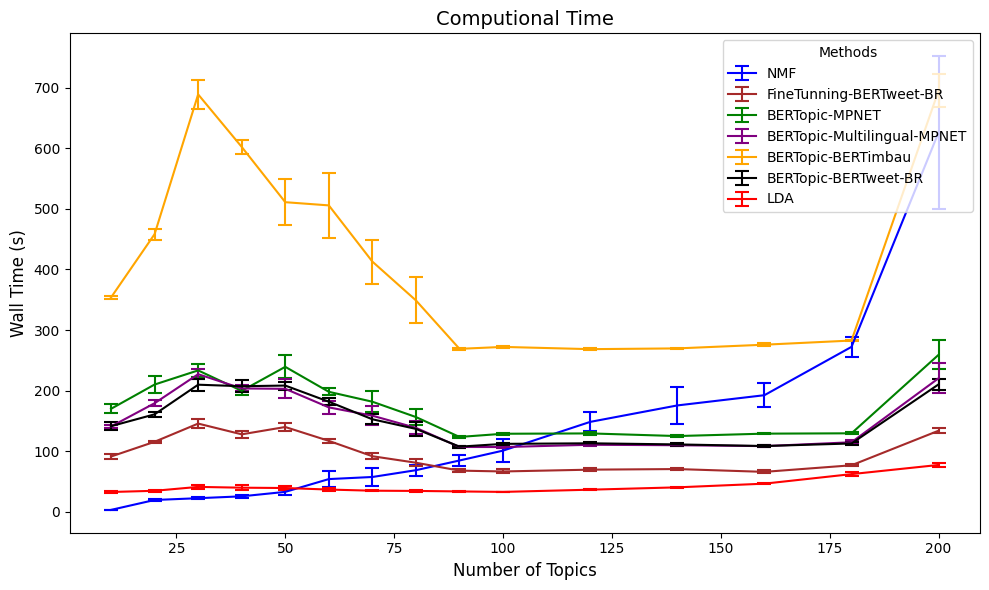

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Function to calculate confidence intervals
def calculate_confidence_interval(data):
    if data.ndim == 1:
        mean = np.mean(data)
        error = np.std(data, ddof=1) / np.sqrt(len(data))
    else:
        mean = np.mean(data, axis=1)
        error = np.std(data, axis=1, ddof=1) / np.sqrt(data.shape[1])
    return mean, error

# Load processed results
results = {}
for num_topics in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]:
    with open(f"training_time_topics_{num_topics}.pkl", "rb") as f:
        results[num_topics] = pickle.load(f)

# Lists for topics and methods
topics_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
methods = ['nmf', 'bertopic-custom-model', 'bertopic-multilingual', 'bertopic-multilingual-MPNET', 'bertopic-bertimbau', 'bertopic-bertweet', 'lda']

# Define colors for each method
colors = {
    'nmf': 'blue',
    'bertopic-custom-model': 'brown',
    'bertopic-multilingual': 'green',
    'bertopic-multilingual-MPNET': 'purple',
    'bertopic-bertimbau': 'orange',
    'bertopic-bertweet': 'black',
    'lda': 'red'
}

method_labels = {
    'nmf': 'NMF',
    'bertopic-custom-model': 'FineTunning-BERTweet-BR',
    'bertopic-multilingual': 'BERTopic-MPNET',
    'bertopic-multilingual-MPNET': 'BERTopic-Multilingual-MPNET',
    'bertopic-bertimbau': 'BERTopic-BERTimbau',
    'bertopic-bertweet': 'BERTopic-BERTweet-BR',
    'lda': 'LDA',
}

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot confidence intervals for each method
for method in methods:
    means = []
    errors = []
    
    for num_topics in topics_list:
        values = np.array(results[num_topics][method])
        mean, error = calculate_confidence_interval(values)
        means.append(mean)
        errors.append(error)

    means = np.array(means)
    errors = np.array(errors)
    
    # Plot line with error bars
    ax.errorbar(topics_list, means, yerr=errors, fmt='-', color=colors[method], label=method_labels[method], capsize=5, elinewidth=1.5, markeredgewidth=1.5)

# Add labels and title
ax.set_xlabel('Number of Topics', fontsize=12)
ax.set_ylabel('Wall Time (s)', fontsize=12)
ax.set_title('Computional Time', fontsize=14)
ax.legend(title='Methods', fontsize=10, loc = 'upper right')

# Show the plot
plt.tight_layout()
plt.savefig("time_by_topics.png", dpi=300, bbox_inches="tight")
plt.show()
